In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd

In [4]:
MOORGATE = (51.518547, -0.088350)
DATE = "2014-12"

URL = "http://data.police.uk/api/crimes-street/all-crime?lat={}&lng={}&date={}".format(
    MOORGATE[0], MOORGATE[1], DATE
)

In [5]:
response = requests.get(URL)
df = pd.read_json(response.content)
df.head()

,category,context,id,location,location_subtype,location_type,month,outcome_status,persistent_id
0,anti-social-behaviour,,38085998,"{u'latitude': u'51.519640', u'street': {u'id':...",,Force,2014-12,None,
1,anti-social-behaviour,,38085999,"{u'latitude': u'51.519640', u'street': {u'id':...",,Force,2014-12,None,
2,anti-social-behaviour,,38086000,"{u'latitude': u'51.517668', u'street': {u'id':...",,Force,2014-12,None,
3,anti-social-behaviour,,46683781,"{u'latitude': u'51.504500', u'street': {u'id':...",STATION,BTP,2014-12,None,
4,anti-social-behaviour,,38086001,"{u'latitude': u'51.515338', u'street': {u'id':...",,Force,2014-12,None,


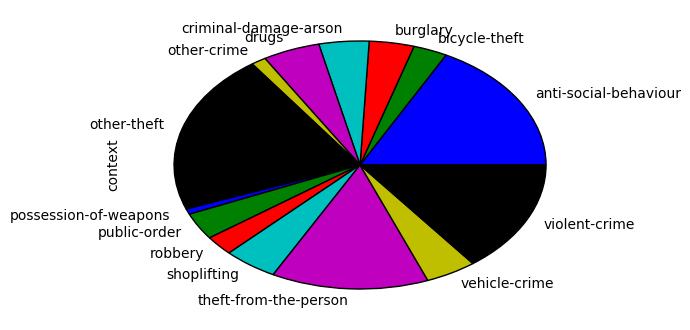

In [6]:
df.groupby('category')['context'].count().plot(kind='pie')

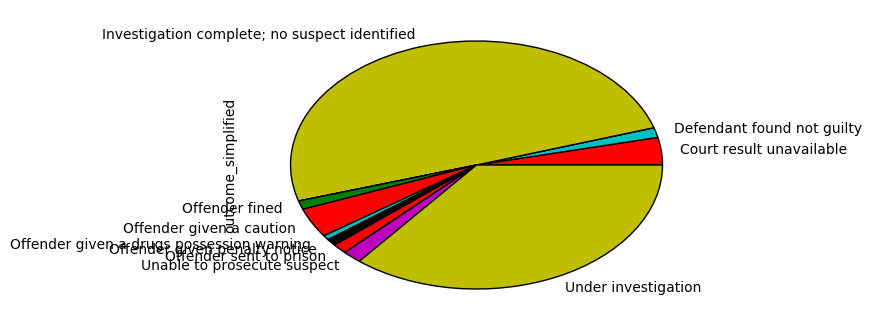

In [7]:
# add an extra column!
extract_category = lambda x: x if x is None else x['category']
df['outcome_simplified'] = df['outcome_status'].apply(extract_category)

counter = df.groupby('outcome_simplified')['outcome_simplified'].count()
to_remove = counter[counter <= 10]
cleaned = counter.replace(to_remove, np.nan)

cleaned.plot(kind='pie')

In [9]:
# per una visualizzazione veloce su mappa
from ipyleaflet import Map, Circle
MOORGATE = (51.518547, -0.088350)
m  = Map(center=MOORGATE, zoom=15)
circles = [Circle(location=pos, radius=25) for pos in [MOORGATE]]
for c in circles: m.add_layer(c)

In [10]:
m  # prints the map

In [38]:
# useful later on
def resetMap():
    global circles
    for c in circles: 
        m.remove_layer(c)
        circles=[]

In [39]:
resetMap()

### Let's combine:
- __maps__ 
- and _interactive widgets_

In [46]:
from ipywidgets import widgets, interact, FloatSlider,SelectMultiple,Dropdown, IntSlider

In [15]:
@interact(x=FloatSlider(min=1e5, max=1e7, step=1e5))
def fun(x):
    print x

100000.0


In [49]:
@interact(category=Dropdown(options=list(df.category.unique()),
                            value=df.category.unique()[0],
                            description='Category:'),
         limit=IntSlider(min=1, max=100))
def filterDf(category='', limit=50):
    global circles, m
    resetMap()
    locations = [(float(l['latitude']), float(l['longitude'])) for l in df[df.category==category].location]
    circles = [Circle(location=pos, radius=30) for pos in locations[:limit]]
    for c in circles: m.add_layer(c)
    return

In [16]:
m

In [50]:
resetMap()